In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

import os 
import tensorflow as tf
import keras
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *


import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
from tensorflow.keras.utils import to_categorical

In [2]:
train_dir = 'images/train/'
test_dir = 'images/test/'

In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [4]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


<bound method NDFrame.head of                                             image    label
0         images/train/fear\Training_59584482.jpg     fear
1        images/train/happy\Training_69185476.jpg    happy
2      images/train/neutral\Training_86128030.jpg  neutral
3        images/train/happy\Training_15550634.jpg    happy
4       images/train/neutral\Training_9014710.jpg  neutral
...                                           ...      ...
28704   images/train/neutral\Training_4011062.jpg  neutral
28705      images/train/sad\Training_45742203.jpg      sad
28706    images/train/angry\Training_19153111.jpg    angry
28707    images/train/happy\Training_29317629.jpg    happy
28708     images/train/fear\Training_62381095.jpg     fear

[28709 rows x 2 columns]>

In [5]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_dir)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,images/test/angry\PrivateTest_10131363.jpg,angry
1,images/test/angry\PrivateTest_10304478.jpg,angry
2,images/test/angry\PrivateTest_1054527.jpg,angry
3,images/test/angry\PrivateTest_10590091.jpg,angry
4,images/test/angry\PrivateTest_1109992.jpg,angry


<Axes: xlabel='count', ylabel='label'>

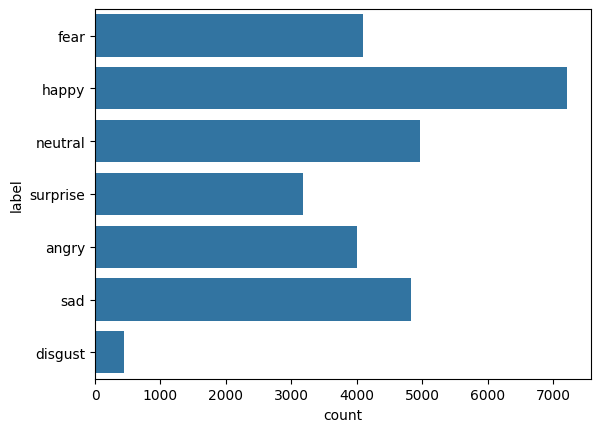

In [6]:
sns.countplot(train['label'])

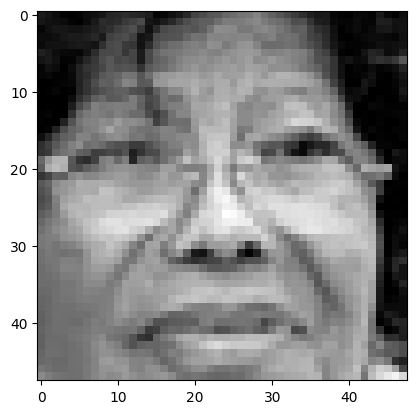

In [7]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

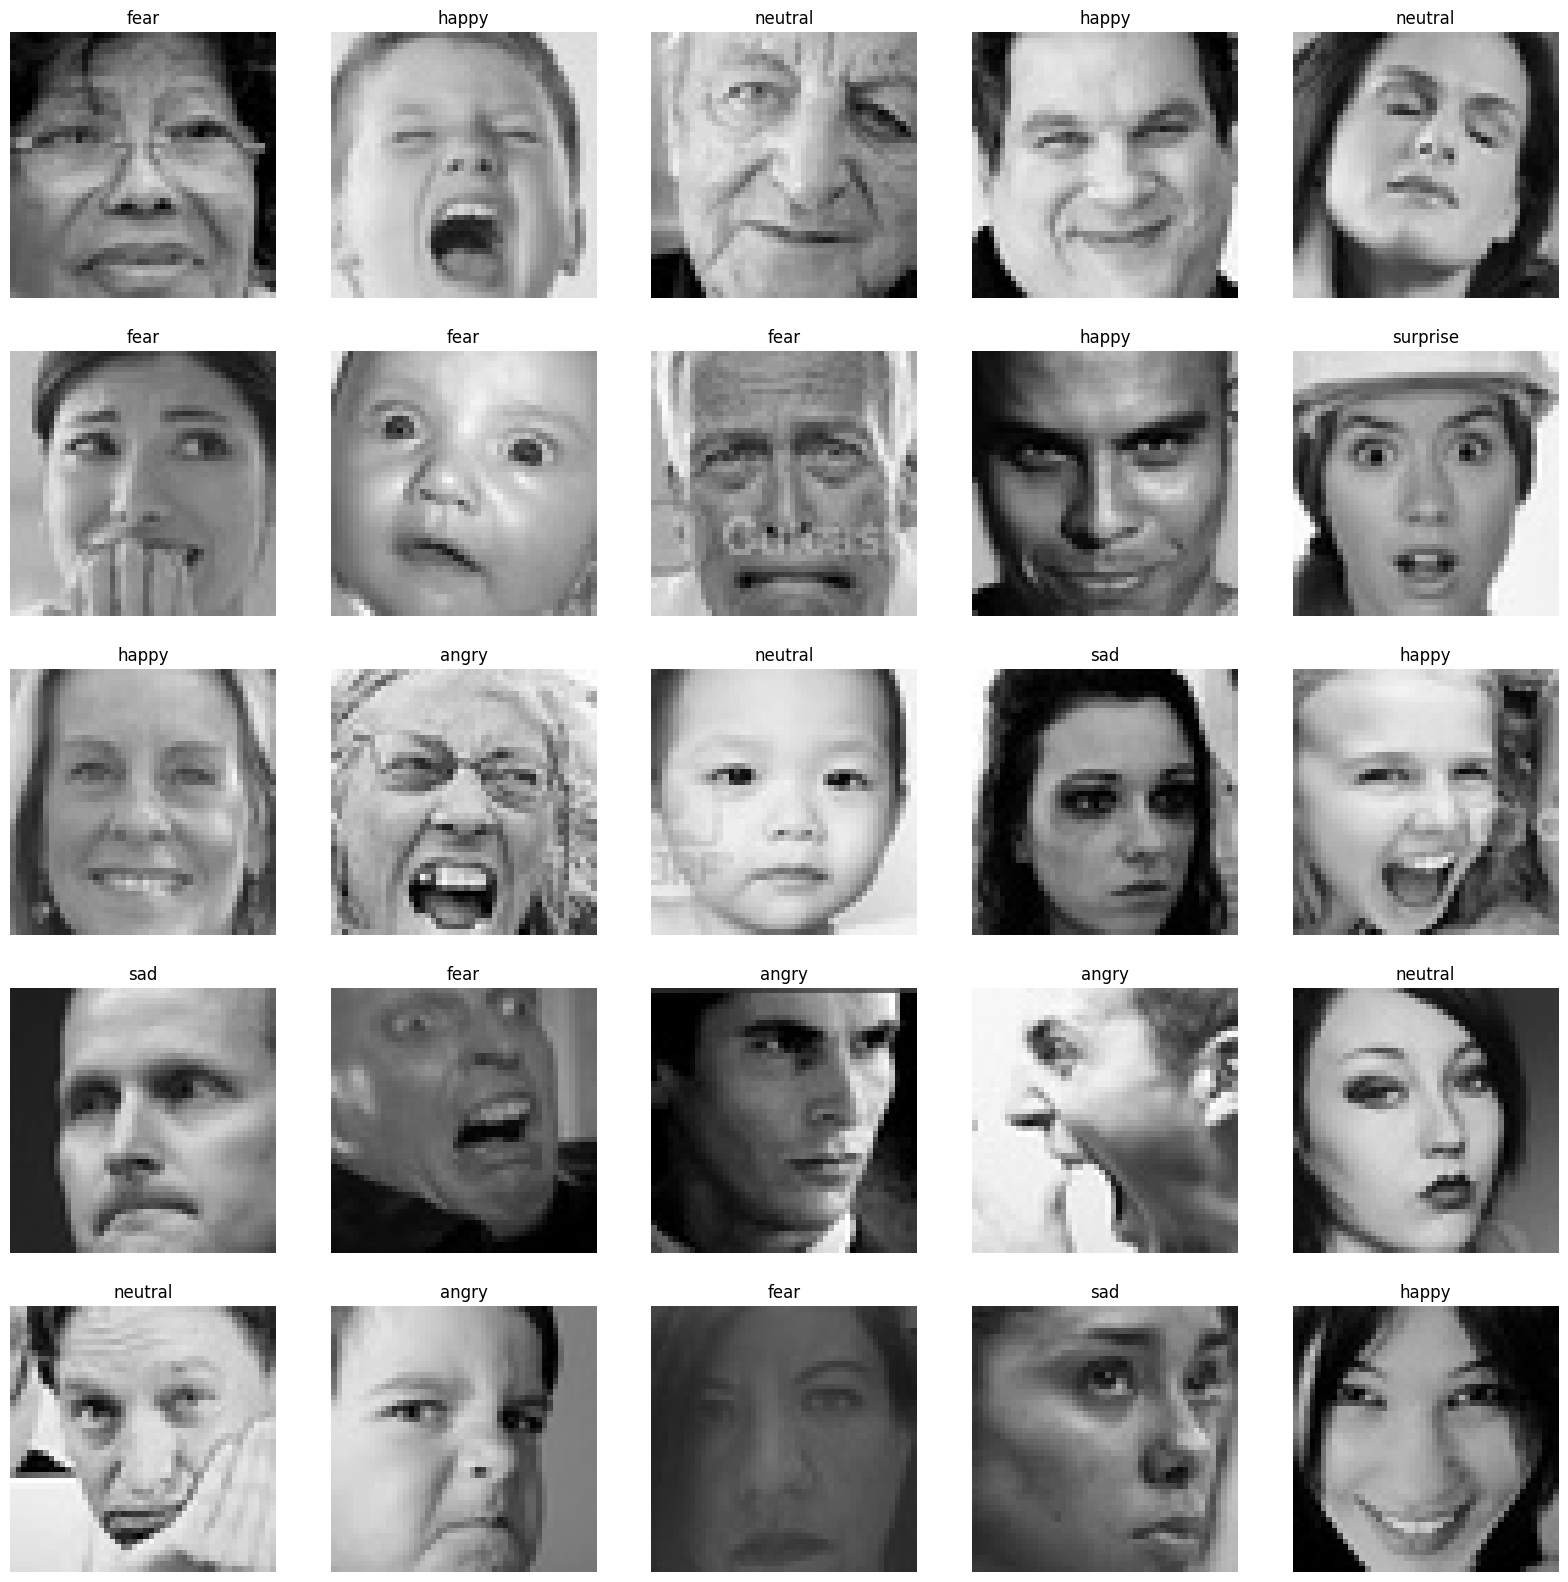

In [8]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

Feature Extraction

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode ="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [12]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [15]:
y_train[0]


array([0., 0., 1., 0., 0., 0., 0.])

In [16]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
json_file = open("emotion_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

#loaded_model.load_weights("emotion_model.h5")
from tensorflow.keras.models import  load_model
model = tf.keras.models.load_model("emotion_model.h5")
print("Loaded Model from disk")

Loaded Model from disk


In [19]:
# train the model
#history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 465s 2s/step - accuracy: 0.2424 - loss: 1.8333 - val_accuracy: 0.2471 - val_loss: 1.8279
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.2517 - loss: 1.8092 - val_accuracy: 0.2981 - val_loss: 1.7068
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.2986 - loss: 1.7142 - val_accuracy: 0.4069 - val_loss: 1.5433
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.3789 - loss: 1.5753 - val_accuracy: 0.4529 - val_loss: 1.3982
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.4314 - loss: 1.4653 - val_accuracy: 0.4815 - val_loss: 1.3451
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.4525 - loss: 1.4082 - val_accuracy: 0.4982 - val_loss: 1.2895
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.4717 - loss: 1.3734 - val_accuracy: 0.5171 - val_loss: 1.2632
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.4933 - loss: 1.3239 - 

In [19]:
CNN_Score = model.evaluate(x_test, y_test)

print("     Test Loss : {:.5f}".format(CNN_Score[0]))
print(" Test Accuracy : {:.2f}".format(CNN_Score[1]*100))

225/225 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.5779 - loss: 1.1406
     Test Loss : 1.03647
 Test Accuracy : 62.93


In [21]:
acc = MODE.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

TypeError: 'History' object is not subscriptable

In [1]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');
plt.tight_layout()

NameError: name 'random' is not defined

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Output: angry


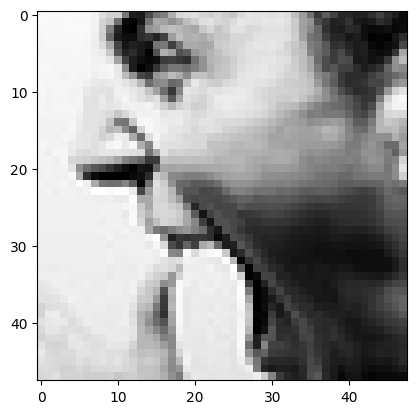

In [33]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

NameError: name 'image_indes' is not defined

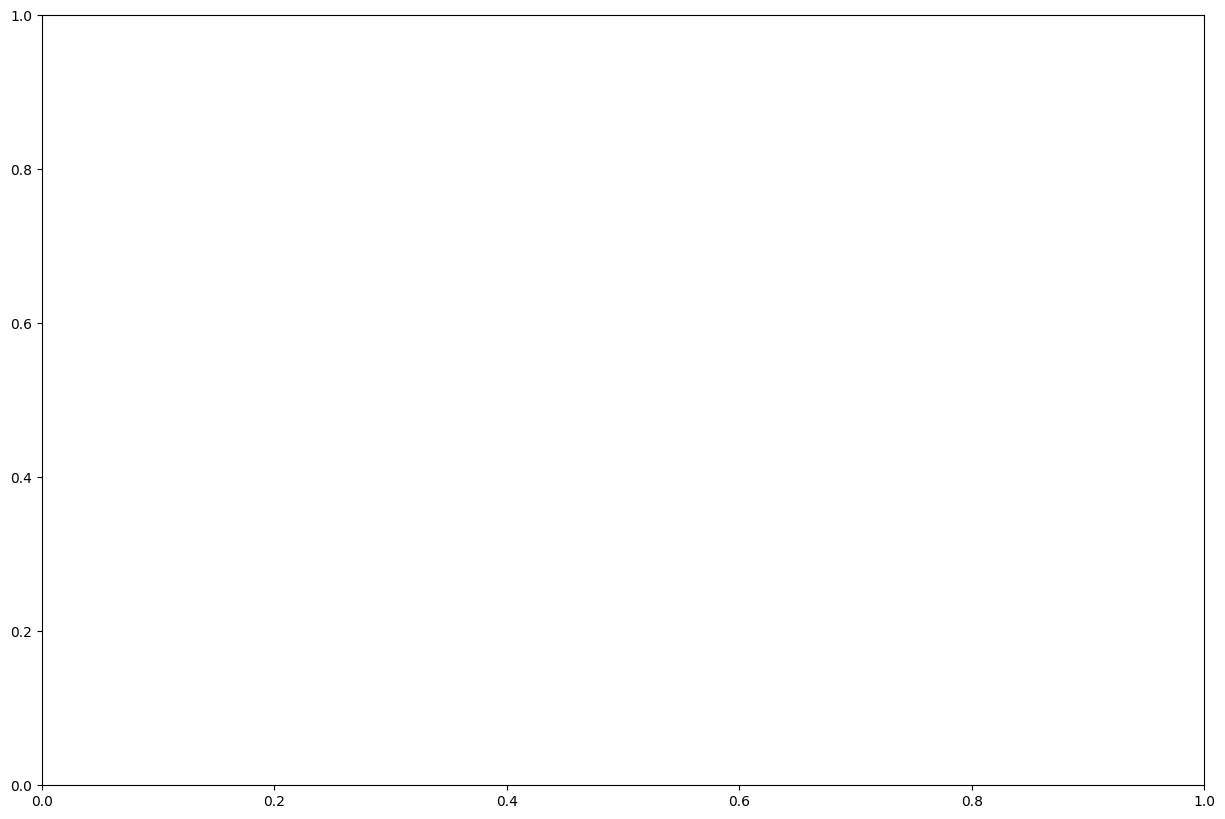

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(x_test[image_indes].label, prediction_label)#ERROR

sns.heatmap(cm, annot=True, fmt='g',ax=ax)


ax.set_xlabel('Predicted labels', fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')

In [ ]:
#model_json = model.to_json()
#with open("emotion_model.json", "w") as json_file:
   # json_file.write(model_json)

In [ ]:
# save trained model weight in .h5 file
#model.save('emotion_model.h5')